# Other preprocessings:

Converts MedicalDecathlonTensors to a version in which:
* We only take from the CT slices the CTs with lungs + just 5% of other stacks
    * First, save the lungs from the Train Split as pngs to analyze where the lungs start

* Apply CLAHE filtering

* Remove the bed on which the patient takes the CT (can apply erode/dilate)

* Segments the lungs using an opensource network with high dice score

# Install

In [1]:
# !pip install -q "monai-weekly[nibabel, skimage, scipy, pillow, tensorboard, gdown, ignite, torchvision, itk, tqdm, lmdb, psutil, cucim, openslide, pandas, einops, transformers, mlflow, clearml, matplotlib, tensorboardX, tifffile, imagecodecs, pyyaml, fire, jsonschema, ninja, pynrrd, pydicom, h5py, nni, optuna, onnx, onnxruntime, zarr, lpips, pynvml, huggingface_hub]"

# Import libraries

In [2]:
import os
import warnings
warnings.filterwarnings("ignore") # remove some scikit-image warnings

from monai.apps import DecathlonDataset
from monai.data import DataLoader
from monai.transforms import (
    LoadImageD,
    Compose,
    LoadImageD,
)

import torch
import numpy as np
import matplotlib.pyplot as plt
import random

#### Set seeds

In [3]:
import sys
from tqdm import tqdm
import pickle as pkl

In [5]:
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

## TRAIN

In [6]:
def read_memoized_data(path, split_name):
    crt_path = f'{path}/{split_name}'
    
    no_patients = len(os.listdir(f'{crt_path}/images'))
    
    patients = []

    for patient_id in range(no_patients):
        img = torch.load(f'{crt_path}/images/patient_{patient_id}.pt')
        label = torch.load(f'{crt_path}/labels/patient_{patient_id}.pt')
        patients.append({"image": img.squeeze(0), "label": label.squeeze(0)})
    
    return patients

    

In [7]:
train_images_path = './plots/TRAIN'

In [8]:
memoized_path = f'/raid/CataChiru/MedicalDecathlonTensors/'


train_dataset = read_memoized_data(memoized_path, 'training')
train_length = len(train_dataset)
train_loader = DataLoader(train_dataset, batch_size = 1, shuffle = False) #, num_workers = 1)

In [9]:
if not os.path.exists(train_images_path):
     os.mkdir(train_images_path)

if not os.path.exists(f'{train_images_path}/patient0'):
    for i in range(train_length):
        os.mkdir(f'{train_images_path}/patient{i}')

for patient_id in tqdm(range(train_length)):
    img = train_dataset[patient_id]['image']

    for stack in range(img.shape[-1]):
        print(f'Current stack {stack} / {img.shape[-1]}')
        plt.imshow(img[..., stack].squeeze(0), cmap = 'gray')
        plt.gca().invert_yaxis()
        plt.gca().set_axis_off()

        plt.savefig(f'{train_images_path}/patient{patient_id}/slice{stack}.png')
        plt.close()


# patient = 0
# print(f'Epoch {patient}/{len(train_dataset)}')

# for stack in range(img.shape[-1]):
#     print(f'Current stack {stack} / {img.shape[-1]}')
#     plt.imshow(img[..., stack].squeeze(0), cmap = 'gray')
#     plt.show()    


  0%|          | 0/51 [00:00<?, ?it/s]

Current stack 0 / 589
Current stack 1 / 589
Current stack 2 / 589
Current stack 3 / 589
Current stack 4 / 589
Current stack 5 / 589
Current stack 6 / 589
Current stack 7 / 589
Current stack 8 / 589
Current stack 9 / 589
Current stack 10 / 589
Current stack 11 / 589
Current stack 12 / 589
Current stack 13 / 589
Current stack 14 / 589
Current stack 15 / 589
Current stack 16 / 589
Current stack 17 / 589
Current stack 18 / 589
Current stack 19 / 589
Current stack 20 / 589
Current stack 21 / 589
Current stack 22 / 589
Current stack 23 / 589
Current stack 24 / 589
Current stack 25 / 589
Current stack 26 / 589
Current stack 27 / 589
Current stack 28 / 589
Current stack 29 / 589
Current stack 30 / 589
Current stack 31 / 589
Current stack 32 / 589
Current stack 33 / 589
Current stack 34 / 589
Current stack 35 / 589
Current stack 36 / 589
Current stack 37 / 589
Current stack 38 / 589
Current stack 39 / 589
Current stack 40 / 589
Current stack 41 / 589
Current stack 42 / 589
Current stack 43 / 58

  2%|▏         | 1/51 [00:58<48:55, 58.70s/it]

Current stack 0 / 267
Current stack 1 / 267
Current stack 2 / 267
Current stack 3 / 267
Current stack 4 / 267
Current stack 5 / 267
Current stack 6 / 267
Current stack 7 / 267
Current stack 8 / 267
Current stack 9 / 267
Current stack 10 / 267
Current stack 11 / 267
Current stack 12 / 267
Current stack 13 / 267
Current stack 14 / 267
Current stack 15 / 267
Current stack 16 / 267
Current stack 17 / 267
Current stack 18 / 267
Current stack 19 / 267
Current stack 20 / 267
Current stack 21 / 267
Current stack 22 / 267
Current stack 23 / 267
Current stack 24 / 267
Current stack 25 / 267
Current stack 26 / 267
Current stack 27 / 267
Current stack 28 / 267
Current stack 29 / 267
Current stack 30 / 267
Current stack 31 / 267
Current stack 32 / 267
Current stack 33 / 267
Current stack 34 / 267
Current stack 35 / 267
Current stack 36 / 267
Current stack 37 / 267
Current stack 38 / 267
Current stack 39 / 267
Current stack 40 / 267
Current stack 41 / 267
Current stack 42 / 267
Current stack 43 / 26

  4%|▍         | 2/51 [01:25<32:50, 40.22s/it]

Current stack 266 / 267
Current stack 0 / 227
Current stack 1 / 227
Current stack 2 / 227
Current stack 3 / 227
Current stack 4 / 227
Current stack 5 / 227
Current stack 6 / 227
Current stack 7 / 227
Current stack 8 / 227
Current stack 9 / 227
Current stack 10 / 227
Current stack 11 / 227
Current stack 12 / 227
Current stack 13 / 227
Current stack 14 / 227
Current stack 15 / 227
Current stack 16 / 227
Current stack 17 / 227
Current stack 18 / 227
Current stack 19 / 227
Current stack 20 / 227
Current stack 21 / 227
Current stack 22 / 227
Current stack 23 / 227
Current stack 24 / 227
Current stack 25 / 227
Current stack 26 / 227
Current stack 27 / 227
Current stack 28 / 227
Current stack 29 / 227
Current stack 30 / 227
Current stack 31 / 227
Current stack 32 / 227
Current stack 33 / 227
Current stack 34 / 227
Current stack 35 / 227
Current stack 36 / 227
Current stack 37 / 227
Current stack 38 / 227
Current stack 39 / 227
Current stack 40 / 227
Current stack 41 / 227
Current stack 42 / 2

  6%|▌         | 3/51 [01:49<26:07, 32.65s/it]

Current stack 226 / 227
Current stack 0 / 450
Current stack 1 / 450
Current stack 2 / 450
Current stack 3 / 450
Current stack 4 / 450
Current stack 5 / 450
Current stack 6 / 450
Current stack 7 / 450
Current stack 8 / 450
Current stack 9 / 450
Current stack 10 / 450
Current stack 11 / 450
Current stack 12 / 450
Current stack 13 / 450
Current stack 14 / 450
Current stack 15 / 450
Current stack 16 / 450
Current stack 17 / 450
Current stack 18 / 450
Current stack 19 / 450
Current stack 20 / 450
Current stack 21 / 450
Current stack 22 / 450
Current stack 23 / 450
Current stack 24 / 450
Current stack 25 / 450
Current stack 26 / 450
Current stack 27 / 450
Current stack 28 / 450
Current stack 29 / 450
Current stack 30 / 450
Current stack 31 / 450
Current stack 32 / 450
Current stack 33 / 450
Current stack 34 / 450
Current stack 35 / 450
Current stack 36 / 450
Current stack 37 / 450
Current stack 38 / 450
Current stack 39 / 450
Current stack 40 / 450
Current stack 41 / 450
Current stack 42 / 4

  8%|▊         | 4/51 [02:35<29:46, 38.01s/it]

Current stack 0 / 277
Current stack 1 / 277
Current stack 2 / 277
Current stack 3 / 277
Current stack 4 / 277
Current stack 5 / 277
Current stack 6 / 277
Current stack 7 / 277
Current stack 8 / 277
Current stack 9 / 277
Current stack 10 / 277
Current stack 11 / 277
Current stack 12 / 277
Current stack 13 / 277
Current stack 14 / 277
Current stack 15 / 277
Current stack 16 / 277
Current stack 17 / 277
Current stack 18 / 277
Current stack 19 / 277
Current stack 20 / 277
Current stack 21 / 277
Current stack 22 / 277
Current stack 23 / 277
Current stack 24 / 277
Current stack 25 / 277
Current stack 26 / 277
Current stack 27 / 277
Current stack 28 / 277
Current stack 29 / 277
Current stack 30 / 277
Current stack 31 / 277
Current stack 32 / 277
Current stack 33 / 277
Current stack 34 / 277
Current stack 35 / 277
Current stack 36 / 277
Current stack 37 / 277
Current stack 38 / 277
Current stack 39 / 277
Current stack 40 / 277
Current stack 41 / 277
Current stack 42 / 277
Current stack 43 / 27

 10%|▉         | 5/51 [03:03<26:17, 34.29s/it]

Current stack 276 / 277
Current stack 0 / 260
Current stack 1 / 260
Current stack 2 / 260
Current stack 3 / 260
Current stack 4 / 260
Current stack 5 / 260
Current stack 6 / 260
Current stack 7 / 260
Current stack 8 / 260
Current stack 9 / 260
Current stack 10 / 260
Current stack 11 / 260
Current stack 12 / 260
Current stack 13 / 260
Current stack 14 / 260
Current stack 15 / 260
Current stack 16 / 260
Current stack 17 / 260
Current stack 18 / 260
Current stack 19 / 260
Current stack 20 / 260
Current stack 21 / 260
Current stack 22 / 260
Current stack 23 / 260
Current stack 24 / 260
Current stack 25 / 260
Current stack 26 / 260
Current stack 27 / 260
Current stack 28 / 260
Current stack 29 / 260
Current stack 30 / 260
Current stack 31 / 260
Current stack 32 / 260
Current stack 33 / 260
Current stack 34 / 260
Current stack 35 / 260
Current stack 36 / 260
Current stack 37 / 260
Current stack 38 / 260
Current stack 39 / 260
Current stack 40 / 260
Current stack 41 / 260
Current stack 42 / 2

 12%|█▏        | 6/51 [03:29<23:38, 31.52s/it]

Current stack 259 / 260
Current stack 0 / 125
Current stack 1 / 125
Current stack 2 / 125
Current stack 3 / 125
Current stack 4 / 125
Current stack 5 / 125
Current stack 6 / 125
Current stack 7 / 125
Current stack 8 / 125
Current stack 9 / 125
Current stack 10 / 125
Current stack 11 / 125
Current stack 12 / 125
Current stack 13 / 125
Current stack 14 / 125
Current stack 15 / 125
Current stack 16 / 125
Current stack 17 / 125
Current stack 18 / 125
Current stack 19 / 125
Current stack 20 / 125
Current stack 21 / 125
Current stack 22 / 125
Current stack 23 / 125
Current stack 24 / 125
Current stack 25 / 125
Current stack 26 / 125
Current stack 27 / 125
Current stack 28 / 125
Current stack 29 / 125
Current stack 30 / 125
Current stack 31 / 125
Current stack 32 / 125
Current stack 33 / 125
Current stack 34 / 125
Current stack 35 / 125
Current stack 36 / 125
Current stack 37 / 125
Current stack 38 / 125
Current stack 39 / 125
Current stack 40 / 125
Current stack 41 / 125
Current stack 42 / 1

 14%|█▎        | 7/51 [03:42<18:32, 25.27s/it]

Current stack 0 / 273
Current stack 1 / 273
Current stack 2 / 273
Current stack 3 / 273
Current stack 4 / 273
Current stack 5 / 273
Current stack 6 / 273
Current stack 7 / 273
Current stack 8 / 273
Current stack 9 / 273
Current stack 10 / 273
Current stack 11 / 273
Current stack 12 / 273
Current stack 13 / 273
Current stack 14 / 273
Current stack 15 / 273
Current stack 16 / 273
Current stack 17 / 273
Current stack 18 / 273
Current stack 19 / 273
Current stack 20 / 273
Current stack 21 / 273
Current stack 22 / 273
Current stack 23 / 273
Current stack 24 / 273
Current stack 25 / 273
Current stack 26 / 273
Current stack 27 / 273
Current stack 28 / 273
Current stack 29 / 273
Current stack 30 / 273
Current stack 31 / 273
Current stack 32 / 273
Current stack 33 / 273
Current stack 34 / 273
Current stack 35 / 273
Current stack 36 / 273
Current stack 37 / 273
Current stack 38 / 273
Current stack 39 / 273
Current stack 40 / 273
Current stack 41 / 273
Current stack 42 / 273
Current stack 43 / 27

 16%|█▌        | 8/51 [04:09<18:37, 25.99s/it]

Current stack 0 / 251
Current stack 1 / 251
Current stack 2 / 251
Current stack 3 / 251
Current stack 4 / 251
Current stack 5 / 251
Current stack 6 / 251
Current stack 7 / 251
Current stack 8 / 251
Current stack 9 / 251
Current stack 10 / 251
Current stack 11 / 251
Current stack 12 / 251
Current stack 13 / 251
Current stack 14 / 251
Current stack 15 / 251
Current stack 16 / 251
Current stack 17 / 251
Current stack 18 / 251
Current stack 19 / 251
Current stack 20 / 251
Current stack 21 / 251
Current stack 22 / 251
Current stack 23 / 251
Current stack 24 / 251
Current stack 25 / 251
Current stack 26 / 251
Current stack 27 / 251
Current stack 28 / 251
Current stack 29 / 251
Current stack 30 / 251
Current stack 31 / 251
Current stack 32 / 251
Current stack 33 / 251
Current stack 34 / 251
Current stack 35 / 251
Current stack 36 / 251
Current stack 37 / 251
Current stack 38 / 251
Current stack 39 / 251
Current stack 40 / 251
Current stack 41 / 251
Current stack 42 / 251
Current stack 43 / 25

 18%|█▊        | 9/51 [04:34<18:01, 25.75s/it]

Current stack 0 / 636
Current stack 1 / 636
Current stack 2 / 636
Current stack 3 / 636
Current stack 4 / 636
Current stack 5 / 636
Current stack 6 / 636
Current stack 7 / 636
Current stack 8 / 636
Current stack 9 / 636
Current stack 10 / 636
Current stack 11 / 636
Current stack 12 / 636
Current stack 13 / 636
Current stack 14 / 636
Current stack 15 / 636
Current stack 16 / 636
Current stack 17 / 636
Current stack 18 / 636
Current stack 19 / 636
Current stack 20 / 636
Current stack 21 / 636
Current stack 22 / 636
Current stack 23 / 636
Current stack 24 / 636
Current stack 25 / 636
Current stack 26 / 636
Current stack 27 / 636
Current stack 28 / 636
Current stack 29 / 636
Current stack 30 / 636
Current stack 31 / 636
Current stack 32 / 636
Current stack 33 / 636
Current stack 34 / 636
Current stack 35 / 636
Current stack 36 / 636
Current stack 37 / 636
Current stack 38 / 636
Current stack 39 / 636
Current stack 40 / 636
Current stack 41 / 636
Current stack 42 / 636
Current stack 43 / 63

 20%|█▉        | 10/51 [05:43<26:43, 39.11s/it]

Current stack 635 / 636
Current stack 0 / 301
Current stack 1 / 301
Current stack 2 / 301
Current stack 3 / 301
Current stack 4 / 301
Current stack 5 / 301
Current stack 6 / 301
Current stack 7 / 301
Current stack 8 / 301
Current stack 9 / 301
Current stack 10 / 301
Current stack 11 / 301
Current stack 12 / 301
Current stack 13 / 301
Current stack 14 / 301
Current stack 15 / 301
Current stack 16 / 301
Current stack 17 / 301
Current stack 18 / 301
Current stack 19 / 301
Current stack 20 / 301
Current stack 21 / 301
Current stack 22 / 301
Current stack 23 / 301
Current stack 24 / 301
Current stack 25 / 301
Current stack 26 / 301
Current stack 27 / 301
Current stack 28 / 301
Current stack 29 / 301
Current stack 30 / 301
Current stack 31 / 301
Current stack 32 / 301
Current stack 33 / 301
Current stack 34 / 301
Current stack 35 / 301
Current stack 36 / 301
Current stack 37 / 301
Current stack 38 / 301
Current stack 39 / 301
Current stack 40 / 301
Current stack 41 / 301
Current stack 42 / 3

 22%|██▏       | 11/51 [06:15<24:33, 36.84s/it]

Current stack 0 / 304
Current stack 1 / 304
Current stack 2 / 304
Current stack 3 / 304
Current stack 4 / 304
Current stack 5 / 304
Current stack 6 / 304
Current stack 7 / 304
Current stack 8 / 304
Current stack 9 / 304
Current stack 10 / 304
Current stack 11 / 304
Current stack 12 / 304
Current stack 13 / 304
Current stack 14 / 304
Current stack 15 / 304
Current stack 16 / 304
Current stack 17 / 304
Current stack 18 / 304
Current stack 19 / 304
Current stack 20 / 304
Current stack 21 / 304
Current stack 22 / 304
Current stack 23 / 304
Current stack 24 / 304
Current stack 25 / 304
Current stack 26 / 304
Current stack 27 / 304
Current stack 28 / 304
Current stack 29 / 304
Current stack 30 / 304
Current stack 31 / 304
Current stack 32 / 304
Current stack 33 / 304
Current stack 34 / 304
Current stack 35 / 304
Current stack 36 / 304
Current stack 37 / 304
Current stack 38 / 304
Current stack 39 / 304
Current stack 40 / 304
Current stack 41 / 304
Current stack 42 / 304
Current stack 43 / 30

 24%|██▎       | 12/51 [06:46<22:51, 35.15s/it]

Current stack 0 / 115
Current stack 1 / 115
Current stack 2 / 115
Current stack 3 / 115
Current stack 4 / 115
Current stack 5 / 115
Current stack 6 / 115
Current stack 7 / 115
Current stack 8 / 115
Current stack 9 / 115
Current stack 10 / 115
Current stack 11 / 115
Current stack 12 / 115
Current stack 13 / 115
Current stack 14 / 115
Current stack 15 / 115
Current stack 16 / 115
Current stack 17 / 115
Current stack 18 / 115
Current stack 19 / 115
Current stack 20 / 115
Current stack 21 / 115
Current stack 22 / 115
Current stack 23 / 115
Current stack 24 / 115
Current stack 25 / 115
Current stack 26 / 115
Current stack 27 / 115
Current stack 28 / 115
Current stack 29 / 115
Current stack 30 / 115
Current stack 31 / 115
Current stack 32 / 115
Current stack 33 / 115
Current stack 34 / 115
Current stack 35 / 115
Current stack 36 / 115
Current stack 37 / 115
Current stack 38 / 115
Current stack 39 / 115
Current stack 40 / 115
Current stack 41 / 115
Current stack 42 / 115
Current stack 43 / 11

 25%|██▌       | 13/51 [06:58<17:46, 28.06s/it]

Current stack 114 / 115
Current stack 0 / 241
Current stack 1 / 241
Current stack 2 / 241
Current stack 3 / 241
Current stack 4 / 241
Current stack 5 / 241
Current stack 6 / 241
Current stack 7 / 241
Current stack 8 / 241
Current stack 9 / 241
Current stack 10 / 241
Current stack 11 / 241
Current stack 12 / 241
Current stack 13 / 241
Current stack 14 / 241
Current stack 15 / 241
Current stack 16 / 241
Current stack 17 / 241
Current stack 18 / 241
Current stack 19 / 241
Current stack 20 / 241
Current stack 21 / 241
Current stack 22 / 241
Current stack 23 / 241
Current stack 24 / 241
Current stack 25 / 241
Current stack 26 / 241
Current stack 27 / 241
Current stack 28 / 241
Current stack 29 / 241
Current stack 30 / 241
Current stack 31 / 241
Current stack 32 / 241
Current stack 33 / 241
Current stack 34 / 241
Current stack 35 / 241
Current stack 36 / 241
Current stack 37 / 241
Current stack 38 / 241
Current stack 39 / 241
Current stack 40 / 241
Current stack 41 / 241
Current stack 42 / 2

 27%|██▋       | 14/51 [07:22<16:34, 26.89s/it]

Current stack 0 / 249
Current stack 1 / 249
Current stack 2 / 249
Current stack 3 / 249
Current stack 4 / 249
Current stack 5 / 249
Current stack 6 / 249
Current stack 7 / 249
Current stack 8 / 249
Current stack 9 / 249
Current stack 10 / 249
Current stack 11 / 249
Current stack 12 / 249
Current stack 13 / 249
Current stack 14 / 249
Current stack 15 / 249
Current stack 16 / 249
Current stack 17 / 249
Current stack 18 / 249
Current stack 19 / 249
Current stack 20 / 249
Current stack 21 / 249
Current stack 22 / 249
Current stack 23 / 249
Current stack 24 / 249
Current stack 25 / 249
Current stack 26 / 249
Current stack 27 / 249
Current stack 28 / 249
Current stack 29 / 249
Current stack 30 / 249
Current stack 31 / 249
Current stack 32 / 249
Current stack 33 / 249
Current stack 34 / 249
Current stack 35 / 249
Current stack 36 / 249
Current stack 37 / 249
Current stack 38 / 249
Current stack 39 / 249
Current stack 40 / 249
Current stack 41 / 249
Current stack 42 / 249
Current stack 43 / 24

 29%|██▉       | 15/51 [07:50<16:20, 27.23s/it]

Current stack 248 / 249
Current stack 0 / 289
Current stack 1 / 289
Current stack 2 / 289
Current stack 3 / 289
Current stack 4 / 289
Current stack 5 / 289
Current stack 6 / 289
Current stack 7 / 289
Current stack 8 / 289
Current stack 9 / 289
Current stack 10 / 289
Current stack 11 / 289
Current stack 12 / 289
Current stack 13 / 289
Current stack 14 / 289
Current stack 15 / 289
Current stack 16 / 289
Current stack 17 / 289
Current stack 18 / 289
Current stack 19 / 289
Current stack 20 / 289
Current stack 21 / 289
Current stack 22 / 289
Current stack 23 / 289
Current stack 24 / 289
Current stack 25 / 289
Current stack 26 / 289
Current stack 27 / 289
Current stack 28 / 289
Current stack 29 / 289
Current stack 30 / 289
Current stack 31 / 289
Current stack 32 / 289
Current stack 33 / 289
Current stack 34 / 289
Current stack 35 / 289
Current stack 36 / 289
Current stack 37 / 289
Current stack 38 / 289
Current stack 39 / 289
Current stack 40 / 289
Current stack 41 / 289
Current stack 42 / 2

 31%|███▏      | 16/51 [08:19<16:12, 27.79s/it]

Current stack 288 / 289
Current stack 0 / 282
Current stack 1 / 282
Current stack 2 / 282
Current stack 3 / 282
Current stack 4 / 282
Current stack 5 / 282
Current stack 6 / 282
Current stack 7 / 282
Current stack 8 / 282
Current stack 9 / 282
Current stack 10 / 282
Current stack 11 / 282
Current stack 12 / 282
Current stack 13 / 282
Current stack 14 / 282
Current stack 15 / 282
Current stack 16 / 282
Current stack 17 / 282
Current stack 18 / 282
Current stack 19 / 282
Current stack 20 / 282
Current stack 21 / 282
Current stack 22 / 282
Current stack 23 / 282
Current stack 24 / 282
Current stack 25 / 282
Current stack 26 / 282
Current stack 27 / 282
Current stack 28 / 282
Current stack 29 / 282
Current stack 30 / 282
Current stack 31 / 282
Current stack 32 / 282
Current stack 33 / 282
Current stack 34 / 282
Current stack 35 / 282
Current stack 36 / 282
Current stack 37 / 282
Current stack 38 / 282
Current stack 39 / 282
Current stack 40 / 282
Current stack 41 / 282
Current stack 42 / 2

 33%|███▎      | 17/51 [08:47<15:46, 27.85s/it]

Current stack 281 / 282
Current stack 0 / 291
Current stack 1 / 291
Current stack 2 / 291
Current stack 3 / 291
Current stack 4 / 291
Current stack 5 / 291
Current stack 6 / 291
Current stack 7 / 291
Current stack 8 / 291
Current stack 9 / 291
Current stack 10 / 291
Current stack 11 / 291
Current stack 12 / 291
Current stack 13 / 291
Current stack 14 / 291
Current stack 15 / 291
Current stack 16 / 291
Current stack 17 / 291
Current stack 18 / 291
Current stack 19 / 291
Current stack 20 / 291
Current stack 21 / 291
Current stack 22 / 291
Current stack 23 / 291
Current stack 24 / 291
Current stack 25 / 291
Current stack 26 / 291
Current stack 27 / 291
Current stack 28 / 291
Current stack 29 / 291
Current stack 30 / 291
Current stack 31 / 291
Current stack 32 / 291
Current stack 33 / 291
Current stack 34 / 291
Current stack 35 / 291
Current stack 36 / 291
Current stack 37 / 291
Current stack 38 / 291
Current stack 39 / 291
Current stack 40 / 291
Current stack 41 / 291
Current stack 42 / 2

 35%|███▌      | 18/51 [09:17<15:33, 28.28s/it]

Current stack 290 / 291
Current stack 0 / 276
Current stack 1 / 276
Current stack 2 / 276
Current stack 3 / 276
Current stack 4 / 276
Current stack 5 / 276
Current stack 6 / 276
Current stack 7 / 276
Current stack 8 / 276
Current stack 9 / 276
Current stack 10 / 276
Current stack 11 / 276
Current stack 12 / 276
Current stack 13 / 276
Current stack 14 / 276
Current stack 15 / 276
Current stack 16 / 276
Current stack 17 / 276
Current stack 18 / 276
Current stack 19 / 276
Current stack 20 / 276
Current stack 21 / 276
Current stack 22 / 276
Current stack 23 / 276
Current stack 24 / 276
Current stack 25 / 276
Current stack 26 / 276
Current stack 27 / 276
Current stack 28 / 276
Current stack 29 / 276
Current stack 30 / 276
Current stack 31 / 276
Current stack 32 / 276
Current stack 33 / 276
Current stack 34 / 276
Current stack 35 / 276
Current stack 36 / 276
Current stack 37 / 276
Current stack 38 / 276
Current stack 39 / 276
Current stack 40 / 276
Current stack 41 / 276
Current stack 42 / 2

 37%|███▋      | 19/51 [09:45<15:09, 28.41s/it]

Current stack 275 / 276
Current stack 0 / 296
Current stack 1 / 296
Current stack 2 / 296
Current stack 3 / 296
Current stack 4 / 296
Current stack 5 / 296
Current stack 6 / 296
Current stack 7 / 296
Current stack 8 / 296
Current stack 9 / 296
Current stack 10 / 296
Current stack 11 / 296
Current stack 12 / 296
Current stack 13 / 296
Current stack 14 / 296
Current stack 15 / 296
Current stack 16 / 296
Current stack 17 / 296
Current stack 18 / 296
Current stack 19 / 296
Current stack 20 / 296
Current stack 21 / 296
Current stack 22 / 296
Current stack 23 / 296
Current stack 24 / 296
Current stack 25 / 296
Current stack 26 / 296
Current stack 27 / 296
Current stack 28 / 296
Current stack 29 / 296
Current stack 30 / 296
Current stack 31 / 296
Current stack 32 / 296
Current stack 33 / 296
Current stack 34 / 296
Current stack 35 / 296
Current stack 36 / 296
Current stack 37 / 296
Current stack 38 / 296
Current stack 39 / 296
Current stack 40 / 296
Current stack 41 / 296
Current stack 42 / 2

 39%|███▉      | 20/51 [10:19<15:29, 29.98s/it]

Current stack 0 / 567
Current stack 1 / 567
Current stack 2 / 567
Current stack 3 / 567
Current stack 4 / 567
Current stack 5 / 567
Current stack 6 / 567
Current stack 7 / 567
Current stack 8 / 567
Current stack 9 / 567
Current stack 10 / 567
Current stack 11 / 567
Current stack 12 / 567
Current stack 13 / 567
Current stack 14 / 567
Current stack 15 / 567
Current stack 16 / 567
Current stack 17 / 567
Current stack 18 / 567
Current stack 19 / 567
Current stack 20 / 567
Current stack 21 / 567
Current stack 22 / 567
Current stack 23 / 567
Current stack 24 / 567
Current stack 25 / 567
Current stack 26 / 567
Current stack 27 / 567
Current stack 28 / 567
Current stack 29 / 567
Current stack 30 / 567
Current stack 31 / 567
Current stack 32 / 567
Current stack 33 / 567
Current stack 34 / 567
Current stack 35 / 567
Current stack 36 / 567
Current stack 37 / 567
Current stack 38 / 567
Current stack 39 / 567
Current stack 40 / 567
Current stack 41 / 567
Current stack 42 / 567
Current stack 43 / 56

 41%|████      | 21/51 [11:13<18:38, 37.27s/it]

Current stack 566 / 567
Current stack 0 / 423
Current stack 1 / 423
Current stack 2 / 423
Current stack 3 / 423
Current stack 4 / 423
Current stack 5 / 423
Current stack 6 / 423
Current stack 7 / 423
Current stack 8 / 423
Current stack 9 / 423
Current stack 10 / 423
Current stack 11 / 423
Current stack 12 / 423
Current stack 13 / 423
Current stack 14 / 423
Current stack 15 / 423
Current stack 16 / 423
Current stack 17 / 423
Current stack 18 / 423
Current stack 19 / 423
Current stack 20 / 423
Current stack 21 / 423
Current stack 22 / 423
Current stack 23 / 423
Current stack 24 / 423
Current stack 25 / 423
Current stack 26 / 423
Current stack 27 / 423
Current stack 28 / 423
Current stack 29 / 423
Current stack 30 / 423
Current stack 31 / 423
Current stack 32 / 423
Current stack 33 / 423
Current stack 34 / 423
Current stack 35 / 423
Current stack 36 / 423
Current stack 37 / 423
Current stack 38 / 423
Current stack 39 / 423
Current stack 40 / 423
Current stack 41 / 423
Current stack 42 / 4

 43%|████▎     | 22/51 [11:56<18:50, 38.98s/it]

Current stack 0 / 242
Current stack 1 / 242
Current stack 2 / 242
Current stack 3 / 242
Current stack 4 / 242
Current stack 5 / 242
Current stack 6 / 242
Current stack 7 / 242
Current stack 8 / 242
Current stack 9 / 242
Current stack 10 / 242
Current stack 11 / 242
Current stack 12 / 242
Current stack 13 / 242
Current stack 14 / 242
Current stack 15 / 242
Current stack 16 / 242
Current stack 17 / 242
Current stack 18 / 242
Current stack 19 / 242
Current stack 20 / 242
Current stack 21 / 242
Current stack 22 / 242
Current stack 23 / 242
Current stack 24 / 242
Current stack 25 / 242
Current stack 26 / 242
Current stack 27 / 242
Current stack 28 / 242
Current stack 29 / 242
Current stack 30 / 242
Current stack 31 / 242
Current stack 32 / 242
Current stack 33 / 242
Current stack 34 / 242
Current stack 35 / 242
Current stack 36 / 242
Current stack 37 / 242
Current stack 38 / 242
Current stack 39 / 242
Current stack 40 / 242
Current stack 41 / 242
Current stack 42 / 242
Current stack 43 / 24

 45%|████▌     | 23/51 [12:21<16:09, 34.62s/it]

Current stack 241 / 242
Current stack 0 / 243
Current stack 1 / 243
Current stack 2 / 243
Current stack 3 / 243
Current stack 4 / 243
Current stack 5 / 243
Current stack 6 / 243
Current stack 7 / 243
Current stack 8 / 243
Current stack 9 / 243
Current stack 10 / 243
Current stack 11 / 243
Current stack 12 / 243
Current stack 13 / 243
Current stack 14 / 243
Current stack 15 / 243
Current stack 16 / 243
Current stack 17 / 243
Current stack 18 / 243
Current stack 19 / 243
Current stack 20 / 243
Current stack 21 / 243
Current stack 22 / 243
Current stack 23 / 243
Current stack 24 / 243
Current stack 25 / 243
Current stack 26 / 243
Current stack 27 / 243
Current stack 28 / 243
Current stack 29 / 243
Current stack 30 / 243
Current stack 31 / 243
Current stack 32 / 243
Current stack 33 / 243
Current stack 34 / 243
Current stack 35 / 243
Current stack 36 / 243
Current stack 37 / 243
Current stack 38 / 243
Current stack 39 / 243
Current stack 40 / 243
Current stack 41 / 243
Current stack 42 / 2

 47%|████▋     | 24/51 [12:50<14:50, 32.98s/it]

Current stack 241 / 243
Current stack 242 / 243
Current stack 0 / 251
Current stack 1 / 251
Current stack 2 / 251
Current stack 3 / 251
Current stack 4 / 251
Current stack 5 / 251
Current stack 6 / 251
Current stack 7 / 251
Current stack 8 / 251
Current stack 9 / 251
Current stack 10 / 251
Current stack 11 / 251
Current stack 12 / 251
Current stack 13 / 251
Current stack 14 / 251
Current stack 15 / 251
Current stack 16 / 251
Current stack 17 / 251
Current stack 18 / 251
Current stack 19 / 251
Current stack 20 / 251
Current stack 21 / 251
Current stack 22 / 251
Current stack 23 / 251
Current stack 24 / 251
Current stack 25 / 251
Current stack 26 / 251
Current stack 27 / 251
Current stack 28 / 251
Current stack 29 / 251
Current stack 30 / 251
Current stack 31 / 251
Current stack 32 / 251
Current stack 33 / 251
Current stack 34 / 251
Current stack 35 / 251
Current stack 36 / 251
Current stack 37 / 251
Current stack 38 / 251
Current stack 39 / 251
Current stack 40 / 251
Current stack 41 / 

 49%|████▉     | 25/51 [13:15<13:14, 30.56s/it]

Current stack 0 / 155
Current stack 1 / 155
Current stack 2 / 155
Current stack 3 / 155
Current stack 4 / 155
Current stack 5 / 155
Current stack 6 / 155
Current stack 7 / 155
Current stack 8 / 155
Current stack 9 / 155
Current stack 10 / 155
Current stack 11 / 155
Current stack 12 / 155
Current stack 13 / 155
Current stack 14 / 155
Current stack 15 / 155
Current stack 16 / 155
Current stack 17 / 155
Current stack 18 / 155
Current stack 19 / 155
Current stack 20 / 155
Current stack 21 / 155
Current stack 22 / 155
Current stack 23 / 155
Current stack 24 / 155
Current stack 25 / 155
Current stack 26 / 155
Current stack 27 / 155
Current stack 28 / 155
Current stack 29 / 155
Current stack 30 / 155
Current stack 31 / 155
Current stack 32 / 155
Current stack 33 / 155
Current stack 34 / 155
Current stack 35 / 155
Current stack 36 / 155
Current stack 37 / 155
Current stack 38 / 155
Current stack 39 / 155
Current stack 40 / 155
Current stack 41 / 155
Current stack 42 / 155
Current stack 43 / 15

 51%|█████     | 26/51 [13:30<10:47, 25.92s/it]

Current stack 153 / 155
Current stack 154 / 155
Current stack 0 / 241
Current stack 1 / 241
Current stack 2 / 241
Current stack 3 / 241
Current stack 4 / 241
Current stack 5 / 241
Current stack 6 / 241
Current stack 7 / 241
Current stack 8 / 241
Current stack 9 / 241
Current stack 10 / 241
Current stack 11 / 241
Current stack 12 / 241
Current stack 13 / 241
Current stack 14 / 241
Current stack 15 / 241
Current stack 16 / 241
Current stack 17 / 241
Current stack 18 / 241
Current stack 19 / 241
Current stack 20 / 241
Current stack 21 / 241
Current stack 22 / 241
Current stack 23 / 241
Current stack 24 / 241
Current stack 25 / 241
Current stack 26 / 241
Current stack 27 / 241
Current stack 28 / 241
Current stack 29 / 241
Current stack 30 / 241
Current stack 31 / 241
Current stack 32 / 241
Current stack 33 / 241
Current stack 34 / 241
Current stack 35 / 241
Current stack 36 / 241
Current stack 37 / 241
Current stack 38 / 241
Current stack 39 / 241
Current stack 40 / 241
Current stack 41 / 

 53%|█████▎    | 27/51 [13:53<10:05, 25.23s/it]

Current stack 240 / 241
Current stack 0 / 304
Current stack 1 / 304
Current stack 2 / 304
Current stack 3 / 304
Current stack 4 / 304
Current stack 5 / 304
Current stack 6 / 304
Current stack 7 / 304
Current stack 8 / 304
Current stack 9 / 304
Current stack 10 / 304
Current stack 11 / 304
Current stack 12 / 304
Current stack 13 / 304
Current stack 14 / 304
Current stack 15 / 304
Current stack 16 / 304
Current stack 17 / 304
Current stack 18 / 304
Current stack 19 / 304
Current stack 20 / 304
Current stack 21 / 304
Current stack 22 / 304
Current stack 23 / 304
Current stack 24 / 304
Current stack 25 / 304
Current stack 26 / 304
Current stack 27 / 304
Current stack 28 / 304
Current stack 29 / 304
Current stack 30 / 304
Current stack 31 / 304
Current stack 32 / 304
Current stack 33 / 304
Current stack 34 / 304
Current stack 35 / 304
Current stack 36 / 304
Current stack 37 / 304
Current stack 38 / 304
Current stack 39 / 304
Current stack 40 / 304
Current stack 41 / 304
Current stack 42 / 3

 55%|█████▍    | 28/51 [14:25<10:20, 26.99s/it]

Current stack 303 / 304
Current stack 0 / 228
Current stack 1 / 228
Current stack 2 / 228
Current stack 3 / 228
Current stack 4 / 228
Current stack 5 / 228
Current stack 6 / 228
Current stack 7 / 228
Current stack 8 / 228
Current stack 9 / 228
Current stack 10 / 228
Current stack 11 / 228
Current stack 12 / 228
Current stack 13 / 228
Current stack 14 / 228
Current stack 15 / 228
Current stack 16 / 228
Current stack 17 / 228
Current stack 18 / 228
Current stack 19 / 228
Current stack 20 / 228
Current stack 21 / 228
Current stack 22 / 228
Current stack 23 / 228
Current stack 24 / 228
Current stack 25 / 228
Current stack 26 / 228
Current stack 27 / 228
Current stack 28 / 228
Current stack 29 / 228
Current stack 30 / 228
Current stack 31 / 228
Current stack 32 / 228
Current stack 33 / 228
Current stack 34 / 228
Current stack 35 / 228
Current stack 36 / 228
Current stack 37 / 228
Current stack 38 / 228
Current stack 39 / 228
Current stack 40 / 228
Current stack 41 / 228
Current stack 42 / 2

 57%|█████▋    | 29/51 [14:48<09:28, 25.85s/it]

Current stack 227 / 228
Current stack 0 / 322
Current stack 1 / 322
Current stack 2 / 322
Current stack 3 / 322
Current stack 4 / 322
Current stack 5 / 322
Current stack 6 / 322
Current stack 7 / 322
Current stack 8 / 322
Current stack 9 / 322
Current stack 10 / 322
Current stack 11 / 322
Current stack 12 / 322
Current stack 13 / 322
Current stack 14 / 322
Current stack 15 / 322
Current stack 16 / 322
Current stack 17 / 322
Current stack 18 / 322
Current stack 19 / 322
Current stack 20 / 322
Current stack 21 / 322
Current stack 22 / 322
Current stack 23 / 322
Current stack 24 / 322
Current stack 25 / 322
Current stack 26 / 322
Current stack 27 / 322
Current stack 28 / 322
Current stack 29 / 322
Current stack 30 / 322
Current stack 31 / 322
Current stack 32 / 322
Current stack 33 / 322
Current stack 34 / 322
Current stack 35 / 322
Current stack 36 / 322
Current stack 37 / 322
Current stack 38 / 322
Current stack 39 / 322
Current stack 40 / 322
Current stack 41 / 322
Current stack 42 / 3

 59%|█████▉    | 30/51 [15:21<09:51, 28.15s/it]

Current stack 321 / 322
Current stack 0 / 226
Current stack 1 / 226
Current stack 2 / 226
Current stack 3 / 226
Current stack 4 / 226
Current stack 5 / 226
Current stack 6 / 226
Current stack 7 / 226
Current stack 8 / 226
Current stack 9 / 226
Current stack 10 / 226
Current stack 11 / 226
Current stack 12 / 226
Current stack 13 / 226
Current stack 14 / 226
Current stack 15 / 226
Current stack 16 / 226
Current stack 17 / 226
Current stack 18 / 226
Current stack 19 / 226
Current stack 20 / 226
Current stack 21 / 226
Current stack 22 / 226
Current stack 23 / 226
Current stack 24 / 226
Current stack 25 / 226
Current stack 26 / 226
Current stack 27 / 226
Current stack 28 / 226
Current stack 29 / 226
Current stack 30 / 226
Current stack 31 / 226
Current stack 32 / 226
Current stack 33 / 226
Current stack 34 / 226
Current stack 35 / 226
Current stack 36 / 226
Current stack 37 / 226
Current stack 38 / 226
Current stack 39 / 226
Current stack 40 / 226
Current stack 41 / 226
Current stack 42 / 2

 61%|██████    | 31/51 [15:50<09:27, 28.36s/it]

Current stack 0 / 256
Current stack 1 / 256
Current stack 2 / 256
Current stack 3 / 256
Current stack 4 / 256
Current stack 5 / 256
Current stack 6 / 256
Current stack 7 / 256
Current stack 8 / 256
Current stack 9 / 256
Current stack 10 / 256
Current stack 11 / 256
Current stack 12 / 256
Current stack 13 / 256
Current stack 14 / 256
Current stack 15 / 256
Current stack 16 / 256
Current stack 17 / 256
Current stack 18 / 256
Current stack 19 / 256
Current stack 20 / 256
Current stack 21 / 256
Current stack 22 / 256
Current stack 23 / 256
Current stack 24 / 256
Current stack 25 / 256
Current stack 26 / 256
Current stack 27 / 256
Current stack 28 / 256
Current stack 29 / 256
Current stack 30 / 256
Current stack 31 / 256
Current stack 32 / 256
Current stack 33 / 256
Current stack 34 / 256
Current stack 35 / 256
Current stack 36 / 256
Current stack 37 / 256
Current stack 38 / 256
Current stack 39 / 256
Current stack 40 / 256
Current stack 41 / 256
Current stack 42 / 256
Current stack 43 / 25

 63%|██████▎   | 32/51 [16:16<08:44, 27.59s/it]

Current stack 254 / 256
Current stack 255 / 256
Current stack 0 / 531
Current stack 1 / 531
Current stack 2 / 531
Current stack 3 / 531
Current stack 4 / 531
Current stack 5 / 531
Current stack 6 / 531
Current stack 7 / 531
Current stack 8 / 531
Current stack 9 / 531
Current stack 10 / 531
Current stack 11 / 531
Current stack 12 / 531
Current stack 13 / 531
Current stack 14 / 531
Current stack 15 / 531
Current stack 16 / 531
Current stack 17 / 531
Current stack 18 / 531
Current stack 19 / 531
Current stack 20 / 531
Current stack 21 / 531
Current stack 22 / 531
Current stack 23 / 531
Current stack 24 / 531
Current stack 25 / 531
Current stack 26 / 531
Current stack 27 / 531
Current stack 28 / 531
Current stack 29 / 531
Current stack 30 / 531
Current stack 31 / 531
Current stack 32 / 531
Current stack 33 / 531
Current stack 34 / 531
Current stack 35 / 531
Current stack 36 / 531
Current stack 37 / 531
Current stack 38 / 531
Current stack 39 / 531
Current stack 40 / 531
Current stack 41 / 

 65%|██████▍   | 33/51 [17:07<10:24, 34.70s/it]

Current stack 530 / 531
Current stack 0 / 483
Current stack 1 / 483
Current stack 2 / 483
Current stack 3 / 483
Current stack 4 / 483
Current stack 5 / 483
Current stack 6 / 483
Current stack 7 / 483
Current stack 8 / 483
Current stack 9 / 483
Current stack 10 / 483
Current stack 11 / 483
Current stack 12 / 483
Current stack 13 / 483
Current stack 14 / 483
Current stack 15 / 483
Current stack 16 / 483
Current stack 17 / 483
Current stack 18 / 483
Current stack 19 / 483
Current stack 20 / 483
Current stack 21 / 483
Current stack 22 / 483
Current stack 23 / 483
Current stack 24 / 483
Current stack 25 / 483
Current stack 26 / 483
Current stack 27 / 483
Current stack 28 / 483
Current stack 29 / 483
Current stack 30 / 483
Current stack 31 / 483
Current stack 32 / 483
Current stack 33 / 483
Current stack 34 / 483
Current stack 35 / 483
Current stack 36 / 483
Current stack 37 / 483
Current stack 38 / 483
Current stack 39 / 483
Current stack 40 / 483
Current stack 41 / 483
Current stack 42 / 4

 67%|██████▋   | 34/51 [17:54<10:48, 38.18s/it]

Current stack 481 / 483
Current stack 482 / 483
Current stack 0 / 314
Current stack 1 / 314
Current stack 2 / 314
Current stack 3 / 314
Current stack 4 / 314
Current stack 5 / 314
Current stack 6 / 314
Current stack 7 / 314
Current stack 8 / 314
Current stack 9 / 314
Current stack 10 / 314
Current stack 11 / 314
Current stack 12 / 314
Current stack 13 / 314
Current stack 14 / 314
Current stack 15 / 314
Current stack 16 / 314
Current stack 17 / 314
Current stack 18 / 314
Current stack 19 / 314
Current stack 20 / 314
Current stack 21 / 314
Current stack 22 / 314
Current stack 23 / 314
Current stack 24 / 314
Current stack 25 / 314
Current stack 26 / 314
Current stack 27 / 314
Current stack 28 / 314
Current stack 29 / 314
Current stack 30 / 314
Current stack 31 / 314
Current stack 32 / 314
Current stack 33 / 314
Current stack 34 / 314
Current stack 35 / 314
Current stack 36 / 314
Current stack 37 / 314
Current stack 38 / 314
Current stack 39 / 314
Current stack 40 / 314
Current stack 41 / 

 69%|██████▊   | 35/51 [18:26<09:45, 36.57s/it]

Current stack 313 / 314
Current stack 0 / 241
Current stack 1 / 241
Current stack 2 / 241
Current stack 3 / 241
Current stack 4 / 241
Current stack 5 / 241
Current stack 6 / 241
Current stack 7 / 241
Current stack 8 / 241
Current stack 9 / 241
Current stack 10 / 241
Current stack 11 / 241
Current stack 12 / 241
Current stack 13 / 241
Current stack 14 / 241
Current stack 15 / 241
Current stack 16 / 241
Current stack 17 / 241
Current stack 18 / 241
Current stack 19 / 241
Current stack 20 / 241
Current stack 21 / 241
Current stack 22 / 241
Current stack 23 / 241
Current stack 24 / 241
Current stack 25 / 241
Current stack 26 / 241
Current stack 27 / 241
Current stack 28 / 241
Current stack 29 / 241
Current stack 30 / 241
Current stack 31 / 241
Current stack 32 / 241
Current stack 33 / 241
Current stack 34 / 241
Current stack 35 / 241
Current stack 36 / 241
Current stack 37 / 241
Current stack 38 / 241
Current stack 39 / 241
Current stack 40 / 241
Current stack 41 / 241
Current stack 42 / 2

 71%|███████   | 36/51 [18:51<08:15, 33.04s/it]

Current stack 240 / 241
Current stack 0 / 211
Current stack 1 / 211
Current stack 2 / 211
Current stack 3 / 211
Current stack 4 / 211
Current stack 5 / 211
Current stack 6 / 211
Current stack 7 / 211
Current stack 8 / 211
Current stack 9 / 211
Current stack 10 / 211
Current stack 11 / 211
Current stack 12 / 211
Current stack 13 / 211
Current stack 14 / 211
Current stack 15 / 211
Current stack 16 / 211
Current stack 17 / 211
Current stack 18 / 211
Current stack 19 / 211
Current stack 20 / 211
Current stack 21 / 211
Current stack 22 / 211
Current stack 23 / 211
Current stack 24 / 211
Current stack 25 / 211
Current stack 26 / 211
Current stack 27 / 211
Current stack 28 / 211
Current stack 29 / 211
Current stack 30 / 211
Current stack 31 / 211
Current stack 32 / 211
Current stack 33 / 211
Current stack 34 / 211
Current stack 35 / 211
Current stack 36 / 211
Current stack 37 / 211
Current stack 38 / 211
Current stack 39 / 211
Current stack 40 / 211
Current stack 41 / 211
Current stack 42 / 2

 73%|███████▎  | 37/51 [19:12<06:53, 29.51s/it]

Current stack 209 / 211
Current stack 210 / 211
Current stack 0 / 128
Current stack 1 / 128
Current stack 2 / 128
Current stack 3 / 128
Current stack 4 / 128
Current stack 5 / 128
Current stack 6 / 128
Current stack 7 / 128
Current stack 8 / 128
Current stack 9 / 128
Current stack 10 / 128
Current stack 11 / 128
Current stack 12 / 128
Current stack 13 / 128
Current stack 14 / 128
Current stack 15 / 128
Current stack 16 / 128
Current stack 17 / 128
Current stack 18 / 128
Current stack 19 / 128
Current stack 20 / 128
Current stack 21 / 128
Current stack 22 / 128
Current stack 23 / 128
Current stack 24 / 128
Current stack 25 / 128
Current stack 26 / 128
Current stack 27 / 128
Current stack 28 / 128
Current stack 29 / 128
Current stack 30 / 128
Current stack 31 / 128
Current stack 32 / 128
Current stack 33 / 128
Current stack 34 / 128
Current stack 35 / 128
Current stack 36 / 128
Current stack 37 / 128
Current stack 38 / 128
Current stack 39 / 128
Current stack 40 / 128
Current stack 41 / 

 75%|███████▍  | 38/51 [19:25<05:18, 24.49s/it]

Current stack 126 / 128
Current stack 127 / 128
Current stack 0 / 218
Current stack 1 / 218
Current stack 2 / 218
Current stack 3 / 218
Current stack 4 / 218
Current stack 5 / 218
Current stack 6 / 218
Current stack 7 / 218
Current stack 8 / 218
Current stack 9 / 218
Current stack 10 / 218
Current stack 11 / 218
Current stack 12 / 218
Current stack 13 / 218
Current stack 14 / 218
Current stack 15 / 218
Current stack 16 / 218
Current stack 17 / 218
Current stack 18 / 218
Current stack 19 / 218
Current stack 20 / 218
Current stack 21 / 218
Current stack 22 / 218
Current stack 23 / 218
Current stack 24 / 218
Current stack 25 / 218
Current stack 26 / 218
Current stack 27 / 218
Current stack 28 / 218
Current stack 29 / 218
Current stack 30 / 218
Current stack 31 / 218
Current stack 32 / 218
Current stack 33 / 218
Current stack 34 / 218
Current stack 35 / 218
Current stack 36 / 218
Current stack 37 / 218
Current stack 38 / 218
Current stack 39 / 218
Current stack 40 / 218
Current stack 41 / 

 76%|███████▋  | 39/51 [19:55<05:11, 25.98s/it]

Current stack 0 / 248
Current stack 1 / 248
Current stack 2 / 248
Current stack 3 / 248
Current stack 4 / 248
Current stack 5 / 248
Current stack 6 / 248
Current stack 7 / 248
Current stack 8 / 248
Current stack 9 / 248
Current stack 10 / 248
Current stack 11 / 248
Current stack 12 / 248
Current stack 13 / 248
Current stack 14 / 248
Current stack 15 / 248
Current stack 16 / 248
Current stack 17 / 248
Current stack 18 / 248
Current stack 19 / 248
Current stack 20 / 248
Current stack 21 / 248
Current stack 22 / 248
Current stack 23 / 248
Current stack 24 / 248
Current stack 25 / 248
Current stack 26 / 248
Current stack 27 / 248
Current stack 28 / 248
Current stack 29 / 248
Current stack 30 / 248
Current stack 31 / 248
Current stack 32 / 248
Current stack 33 / 248
Current stack 34 / 248
Current stack 35 / 248
Current stack 36 / 248
Current stack 37 / 248
Current stack 38 / 248
Current stack 39 / 248
Current stack 40 / 248
Current stack 41 / 248
Current stack 42 / 248
Current stack 43 / 24

 78%|███████▊  | 40/51 [20:20<04:44, 25.90s/it]

Current stack 0 / 241
Current stack 1 / 241
Current stack 2 / 241
Current stack 3 / 241
Current stack 4 / 241
Current stack 5 / 241
Current stack 6 / 241
Current stack 7 / 241
Current stack 8 / 241
Current stack 9 / 241
Current stack 10 / 241
Current stack 11 / 241
Current stack 12 / 241
Current stack 13 / 241
Current stack 14 / 241
Current stack 15 / 241
Current stack 16 / 241
Current stack 17 / 241
Current stack 18 / 241
Current stack 19 / 241
Current stack 20 / 241
Current stack 21 / 241
Current stack 22 / 241
Current stack 23 / 241
Current stack 24 / 241
Current stack 25 / 241
Current stack 26 / 241
Current stack 27 / 241
Current stack 28 / 241
Current stack 29 / 241
Current stack 30 / 241
Current stack 31 / 241
Current stack 32 / 241
Current stack 33 / 241
Current stack 34 / 241
Current stack 35 / 241
Current stack 36 / 241
Current stack 37 / 241
Current stack 38 / 241
Current stack 39 / 241
Current stack 40 / 241
Current stack 41 / 241
Current stack 42 / 241
Current stack 43 / 24

 80%|████████  | 41/51 [20:45<04:13, 25.38s/it]

Current stack 240 / 241
Current stack 0 / 271
Current stack 1 / 271
Current stack 2 / 271
Current stack 3 / 271
Current stack 4 / 271
Current stack 5 / 271
Current stack 6 / 271
Current stack 7 / 271
Current stack 8 / 271
Current stack 9 / 271
Current stack 10 / 271
Current stack 11 / 271
Current stack 12 / 271
Current stack 13 / 271
Current stack 14 / 271
Current stack 15 / 271
Current stack 16 / 271
Current stack 17 / 271
Current stack 18 / 271
Current stack 19 / 271
Current stack 20 / 271
Current stack 21 / 271
Current stack 22 / 271
Current stack 23 / 271
Current stack 24 / 271
Current stack 25 / 271
Current stack 26 / 271
Current stack 27 / 271
Current stack 28 / 271
Current stack 29 / 271
Current stack 30 / 271
Current stack 31 / 271
Current stack 32 / 271
Current stack 33 / 271
Current stack 34 / 271
Current stack 35 / 271
Current stack 36 / 271
Current stack 37 / 271
Current stack 38 / 271
Current stack 39 / 271
Current stack 40 / 271
Current stack 41 / 271
Current stack 42 / 2

 82%|████████▏ | 42/51 [21:12<03:55, 26.12s/it]

Current stack 0 / 251
Current stack 1 / 251
Current stack 2 / 251
Current stack 3 / 251
Current stack 4 / 251
Current stack 5 / 251
Current stack 6 / 251
Current stack 7 / 251
Current stack 8 / 251
Current stack 9 / 251
Current stack 10 / 251
Current stack 11 / 251
Current stack 12 / 251
Current stack 13 / 251
Current stack 14 / 251
Current stack 15 / 251
Current stack 16 / 251
Current stack 17 / 251
Current stack 18 / 251
Current stack 19 / 251
Current stack 20 / 251
Current stack 21 / 251
Current stack 22 / 251
Current stack 23 / 251
Current stack 24 / 251
Current stack 25 / 251
Current stack 26 / 251
Current stack 27 / 251
Current stack 28 / 251
Current stack 29 / 251
Current stack 30 / 251
Current stack 31 / 251
Current stack 32 / 251
Current stack 33 / 251
Current stack 34 / 251
Current stack 35 / 251
Current stack 36 / 251
Current stack 37 / 251
Current stack 38 / 251
Current stack 39 / 251
Current stack 40 / 251
Current stack 41 / 251
Current stack 42 / 251
Current stack 43 / 25

 84%|████████▍ | 43/51 [21:38<03:27, 25.89s/it]

Current stack 0 / 241
Current stack 1 / 241
Current stack 2 / 241
Current stack 3 / 241
Current stack 4 / 241
Current stack 5 / 241
Current stack 6 / 241
Current stack 7 / 241
Current stack 8 / 241
Current stack 9 / 241
Current stack 10 / 241
Current stack 11 / 241
Current stack 12 / 241
Current stack 13 / 241
Current stack 14 / 241
Current stack 15 / 241
Current stack 16 / 241
Current stack 17 / 241
Current stack 18 / 241
Current stack 19 / 241
Current stack 20 / 241
Current stack 21 / 241
Current stack 22 / 241
Current stack 23 / 241
Current stack 24 / 241
Current stack 25 / 241
Current stack 26 / 241
Current stack 27 / 241
Current stack 28 / 241
Current stack 29 / 241
Current stack 30 / 241
Current stack 31 / 241
Current stack 32 / 241
Current stack 33 / 241
Current stack 34 / 241
Current stack 35 / 241
Current stack 36 / 241
Current stack 37 / 241
Current stack 38 / 241
Current stack 39 / 241
Current stack 40 / 241
Current stack 41 / 241
Current stack 42 / 241
Current stack 43 / 24

 86%|████████▋ | 44/51 [22:02<02:58, 25.44s/it]

Current stack 0 / 329
Current stack 1 / 329
Current stack 2 / 329
Current stack 3 / 329
Current stack 4 / 329
Current stack 5 / 329
Current stack 6 / 329
Current stack 7 / 329
Current stack 8 / 329
Current stack 9 / 329
Current stack 10 / 329
Current stack 11 / 329
Current stack 12 / 329
Current stack 13 / 329
Current stack 14 / 329
Current stack 15 / 329
Current stack 16 / 329
Current stack 17 / 329
Current stack 18 / 329
Current stack 19 / 329
Current stack 20 / 329
Current stack 21 / 329
Current stack 22 / 329
Current stack 23 / 329
Current stack 24 / 329
Current stack 25 / 329
Current stack 26 / 329
Current stack 27 / 329
Current stack 28 / 329
Current stack 29 / 329
Current stack 30 / 329
Current stack 31 / 329
Current stack 32 / 329
Current stack 33 / 329
Current stack 34 / 329
Current stack 35 / 329
Current stack 36 / 329
Current stack 37 / 329
Current stack 38 / 329
Current stack 39 / 329
Current stack 40 / 329
Current stack 41 / 329
Current stack 42 / 329
Current stack 43 / 32

 88%|████████▊ | 45/51 [22:37<02:49, 28.23s/it]

Current stack 328 / 329
Current stack 0 / 228
Current stack 1 / 228
Current stack 2 / 228
Current stack 3 / 228
Current stack 4 / 228
Current stack 5 / 228
Current stack 6 / 228
Current stack 7 / 228
Current stack 8 / 228
Current stack 9 / 228
Current stack 10 / 228
Current stack 11 / 228
Current stack 12 / 228
Current stack 13 / 228
Current stack 14 / 228
Current stack 15 / 228
Current stack 16 / 228
Current stack 17 / 228
Current stack 18 / 228
Current stack 19 / 228
Current stack 20 / 228
Current stack 21 / 228
Current stack 22 / 228
Current stack 23 / 228
Current stack 24 / 228
Current stack 25 / 228
Current stack 26 / 228
Current stack 27 / 228
Current stack 28 / 228
Current stack 29 / 228
Current stack 30 / 228
Current stack 31 / 228
Current stack 32 / 228
Current stack 33 / 228
Current stack 34 / 228
Current stack 35 / 228
Current stack 36 / 228
Current stack 37 / 228
Current stack 38 / 228
Current stack 39 / 228
Current stack 40 / 228
Current stack 41 / 228
Current stack 42 / 2

 90%|█████████ | 46/51 [23:00<02:14, 26.81s/it]

Current stack 227 / 228
Current stack 0 / 242
Current stack 1 / 242
Current stack 2 / 242
Current stack 3 / 242
Current stack 4 / 242
Current stack 5 / 242
Current stack 6 / 242
Current stack 7 / 242
Current stack 8 / 242
Current stack 9 / 242
Current stack 10 / 242
Current stack 11 / 242
Current stack 12 / 242
Current stack 13 / 242
Current stack 14 / 242
Current stack 15 / 242
Current stack 16 / 242
Current stack 17 / 242
Current stack 18 / 242
Current stack 19 / 242
Current stack 20 / 242
Current stack 21 / 242
Current stack 22 / 242
Current stack 23 / 242
Current stack 24 / 242
Current stack 25 / 242
Current stack 26 / 242
Current stack 27 / 242
Current stack 28 / 242
Current stack 29 / 242
Current stack 30 / 242
Current stack 31 / 242
Current stack 32 / 242
Current stack 33 / 242
Current stack 34 / 242
Current stack 35 / 242
Current stack 36 / 242
Current stack 37 / 242
Current stack 38 / 242
Current stack 39 / 242
Current stack 40 / 242
Current stack 41 / 242
Current stack 42 / 2

 92%|█████████▏| 47/51 [23:25<01:44, 26.06s/it]

Current stack 0 / 252
Current stack 1 / 252
Current stack 2 / 252
Current stack 3 / 252
Current stack 4 / 252
Current stack 5 / 252
Current stack 6 / 252
Current stack 7 / 252
Current stack 8 / 252
Current stack 9 / 252
Current stack 10 / 252
Current stack 11 / 252
Current stack 12 / 252
Current stack 13 / 252
Current stack 14 / 252
Current stack 15 / 252
Current stack 16 / 252
Current stack 17 / 252
Current stack 18 / 252
Current stack 19 / 252
Current stack 20 / 252
Current stack 21 / 252
Current stack 22 / 252
Current stack 23 / 252
Current stack 24 / 252
Current stack 25 / 252
Current stack 26 / 252
Current stack 27 / 252
Current stack 28 / 252
Current stack 29 / 252
Current stack 30 / 252
Current stack 31 / 252
Current stack 32 / 252
Current stack 33 / 252
Current stack 34 / 252
Current stack 35 / 252
Current stack 36 / 252
Current stack 37 / 252
Current stack 38 / 252
Current stack 39 / 252
Current stack 40 / 252
Current stack 41 / 252
Current stack 42 / 252
Current stack 43 / 25

 94%|█████████▍| 48/51 [23:50<01:17, 25.84s/it]

Current stack 251 / 252
Current stack 0 / 266
Current stack 1 / 266
Current stack 2 / 266
Current stack 3 / 266
Current stack 4 / 266
Current stack 5 / 266
Current stack 6 / 266
Current stack 7 / 266
Current stack 8 / 266
Current stack 9 / 266
Current stack 10 / 266
Current stack 11 / 266
Current stack 12 / 266
Current stack 13 / 266
Current stack 14 / 266
Current stack 15 / 266
Current stack 16 / 266
Current stack 17 / 266
Current stack 18 / 266
Current stack 19 / 266
Current stack 20 / 266
Current stack 21 / 266
Current stack 22 / 266
Current stack 23 / 266
Current stack 24 / 266
Current stack 25 / 266
Current stack 26 / 266
Current stack 27 / 266
Current stack 28 / 266
Current stack 29 / 266
Current stack 30 / 266
Current stack 31 / 266
Current stack 32 / 266
Current stack 33 / 266
Current stack 34 / 266
Current stack 35 / 266
Current stack 36 / 266
Current stack 37 / 266
Current stack 38 / 266
Current stack 39 / 266
Current stack 40 / 266
Current stack 41 / 266
Current stack 42 / 2

 96%|█████████▌| 49/51 [24:17<00:52, 26.24s/it]

Current stack 0 / 126
Current stack 1 / 126
Current stack 2 / 126
Current stack 3 / 126
Current stack 4 / 126
Current stack 5 / 126
Current stack 6 / 126
Current stack 7 / 126
Current stack 8 / 126
Current stack 9 / 126
Current stack 10 / 126
Current stack 11 / 126
Current stack 12 / 126
Current stack 13 / 126
Current stack 14 / 126
Current stack 15 / 126
Current stack 16 / 126
Current stack 17 / 126
Current stack 18 / 126
Current stack 19 / 126
Current stack 20 / 126
Current stack 21 / 126
Current stack 22 / 126
Current stack 23 / 126
Current stack 24 / 126
Current stack 25 / 126
Current stack 26 / 126
Current stack 27 / 126
Current stack 28 / 126
Current stack 29 / 126
Current stack 30 / 126
Current stack 31 / 126
Current stack 32 / 126
Current stack 33 / 126
Current stack 34 / 126
Current stack 35 / 126
Current stack 36 / 126
Current stack 37 / 126
Current stack 38 / 126
Current stack 39 / 126
Current stack 40 / 126
Current stack 41 / 126
Current stack 42 / 126
Current stack 43 / 12

 98%|█████████▊| 50/51 [24:30<00:22, 22.12s/it]

Current stack 125 / 126
Current stack 0 / 125
Current stack 1 / 125
Current stack 2 / 125
Current stack 3 / 125
Current stack 4 / 125
Current stack 5 / 125
Current stack 6 / 125
Current stack 7 / 125
Current stack 8 / 125
Current stack 9 / 125
Current stack 10 / 125
Current stack 11 / 125
Current stack 12 / 125
Current stack 13 / 125
Current stack 14 / 125
Current stack 15 / 125
Current stack 16 / 125
Current stack 17 / 125
Current stack 18 / 125
Current stack 19 / 125
Current stack 20 / 125
Current stack 21 / 125
Current stack 22 / 125
Current stack 23 / 125
Current stack 24 / 125
Current stack 25 / 125
Current stack 26 / 125
Current stack 27 / 125
Current stack 28 / 125
Current stack 29 / 125
Current stack 30 / 125
Current stack 31 / 125
Current stack 32 / 125
Current stack 33 / 125
Current stack 34 / 125
Current stack 35 / 125
Current stack 36 / 125
Current stack 37 / 125
Current stack 38 / 125
Current stack 39 / 125
Current stack 40 / 125
Current stack 41 / 125
Current stack 42 / 1

100%|██████████| 51/51 [24:51<00:00, 29.25s/it]

Current stack 124 / 125


In [ ]:
# Memoize stacks in between we find the lungs
# Based on the radiologist, some CTs start from kidney area up to the cervical backbone
patient_useful_slices = {
    0 : {'start': 60, 'stop': 557},
    1 : {'start': 20 , 'stop': 243},
    2 : {'start': 0, 'stop': 213},
    3 : {'start': 48, 'stop': 437},
    4 : {'start': 52, 'stop': 258},
    5 : {'start': 59, 'stop': 244},
    6 : {'start': 9, 'stop': 122},
    7 : {'start': 44, 'stop': 260},
    8 : {'start': 3, 'stop': 237},
    9 : {'start': 330 , 'stop': 623},
    10 : {'start': 56, 'stop': 280},
    11 : {'start': 26, 'stop': 292},
    12 : {'start': 0, 'stop': 108},
    13 : {'start': 10, 'stop': 227},
    14 : {'start': 25, 'stop': 231},
    15 : {'start': 35, 'stop': 280},
    16 : {'start': 37, 'stop': 262},
    17 : {'start': 29, 'stop': 266},
    18 : {'start': 48, 'stop': 261},
    19 : {'start': 65, 'stop': 275},
    20 : {'start': 145, 'stop': 520},
    21 : {'start': 0, 'stop': 397},
    22 : {'start': 9, 'stop': 225},
    23 : {'start': 6, 'stop': 227},
    24 : {'start': 15, 'stop': 239},
    25 : {'start': 40, 'stop': 149},
    26 : {'start': 30, 'stop': 231},
    27 : {'start': 49, 'stop': 295},
    28 : {'start': 33, 'stop': 217},
    29 : {'start': 50, 'stop': 311},
    30 : {'start': 0, 'stop': 213},
    31 : {'start': 22, 'stop': 248},
    32 : {'start': 88, 'stop': 493},
    33 : {'start': 116, 'stop': 439},
    34 : {'start': 40, 'stop': 300},
    35 : {'start': 0, 'stop': 227},
    36 : {'start': 0, 'stop': 198},
    37 : {'start': 0, 'stop': 120},
    38 : {'start': 0, 'stop': 203},
    39 : {'start': 44, 'stop': 228},
    40 : {'start': 0, 'stop': 229},
    41 : {'start': 35, 'stop': 250},
    42 : {'start': 48, 'stop': 243},
    43 : {'start': 5, 'stop': 230},
    44 : {'start': 88, 'stop': 314},
    45 : {'start': 7, 'stop': 220},
    46 : {'start': 11, 'stop': 232},
    47 : {'start': 21, 'stop': 229},
    48 : {'start': 4, 'stop': 255},
    49 : {'start': 2, 'stop': 122},
    50 : {'start': 14, 'stop': 119}
}

# Further used in convert_dataset.ipynb to save the useful slices

In [17]:
import cv2

In [20]:
clahe = cv2.createCLAHE(clipLimit=5)
final_img = clahe.apply(a.numpy().astype(np.uint8))

error: OpenCV(4.10.0) /io/opencv/modules/core/src/matrix.cpp:804: error: (-215:Assertion failed) m.dims <= 2 in function 'Mat'


In [23]:
a = train_dataset[0]['image']
a.shape

torch.Size([512, 512, 589])

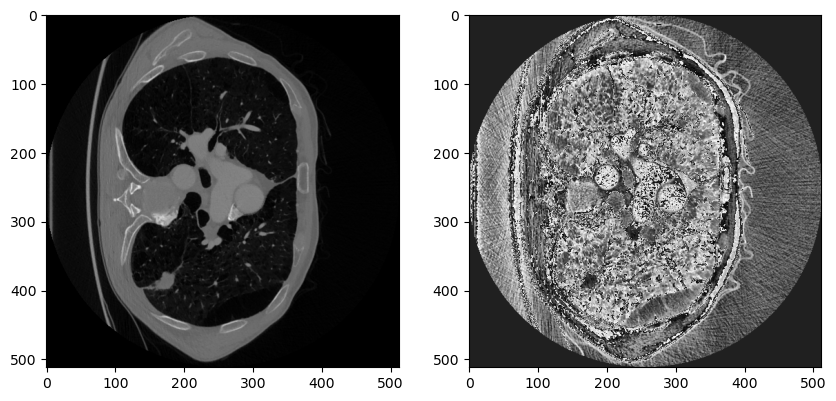

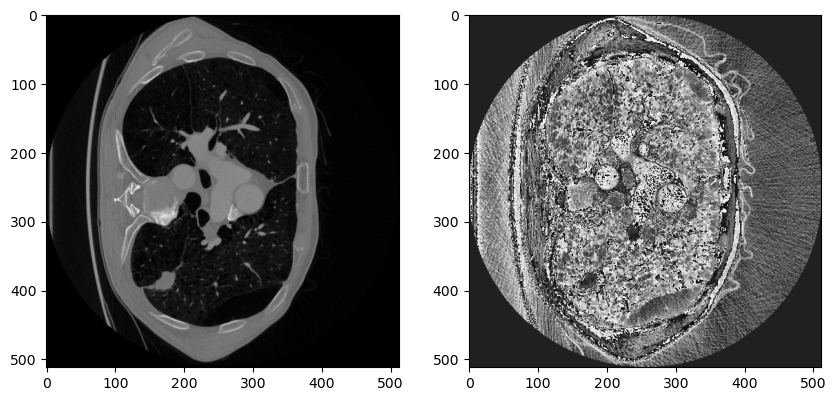

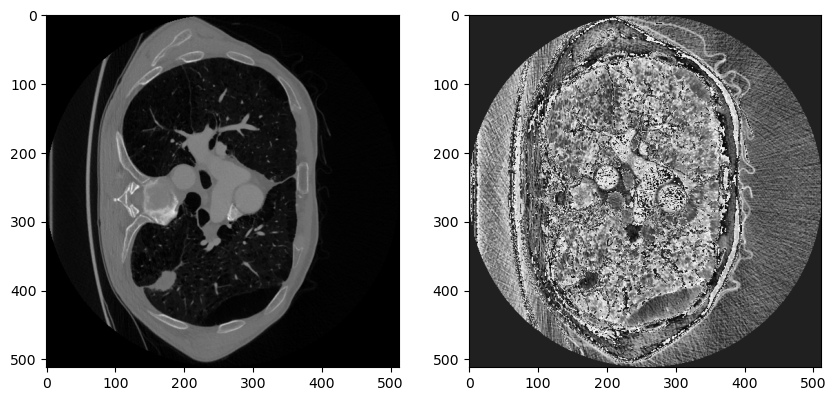

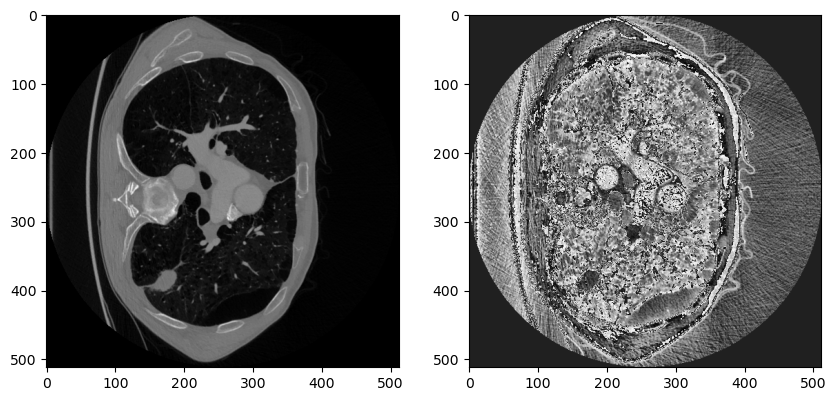

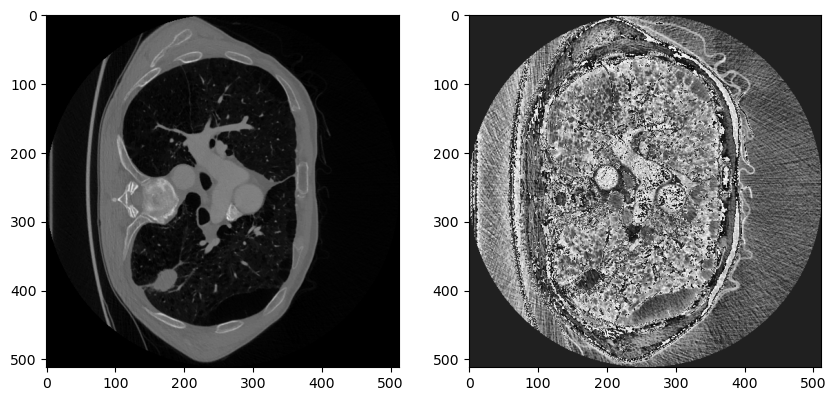

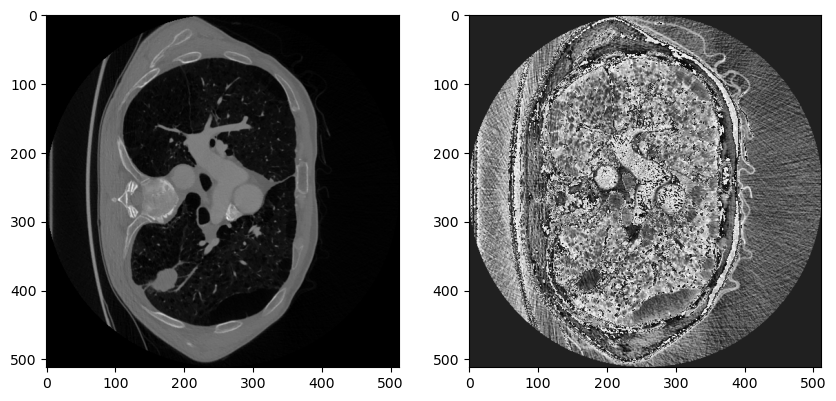

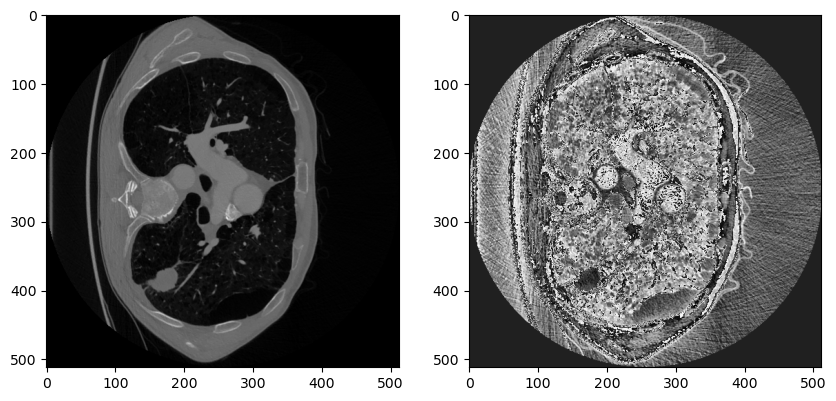

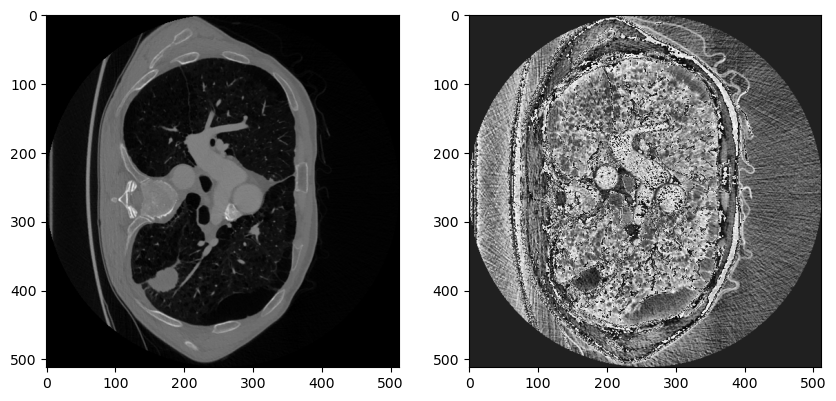

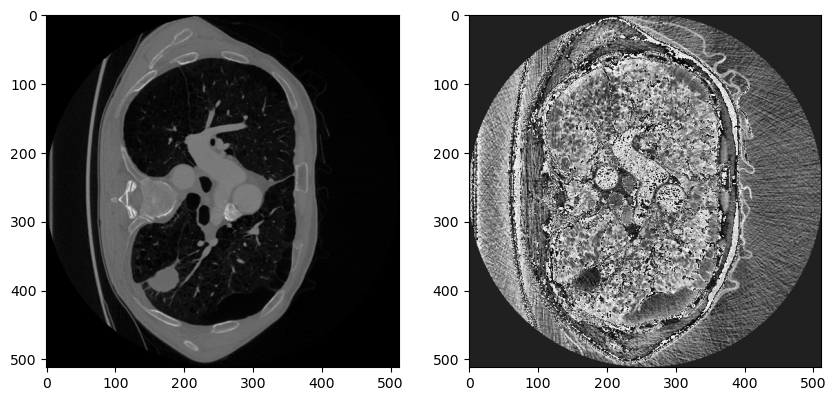

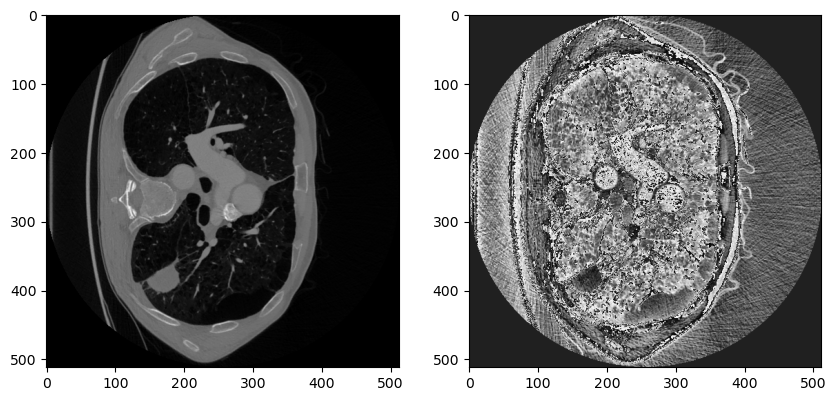

In [51]:

for i in range(340, 350):
    clahe = cv2.createCLAHE(clipLimit=2)
    final_img = clahe.apply(a[..., i].numpy().astype(np.uint8)) + 30

    fig, axes = plt.subplots(1, 2, figsize = (10, 5))
    axes[0].imshow(a[..., i].squeeze(0), cmap = 'gray')
    axes[1].imshow(final_img, cmap = 'gray')
    plt.show()